#Task 2

###The task involves performing a binary classification on the "Type" column, which is present in "table_2.csv".The goal is to classify the "Type" column (which contains values 'n' and 't') into two categories, likely representing a binary outcome (e.g., 0 and 1)

Approach : To do this 1. merge the tables using the "ID" column and use the features from both tables to train a classification model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_auc_score
)


## 2. Load Data

In [ ]:
# Load the datasets
table1 = pd.read_csv('/content/drive/MyDrive/BMW_csv_files/table_1.csv', sep=';')
table2 = pd.read_csv('/content/drive/MyDrive/BMW_csv_files/table_2.csv', sep=';')

In [ ]:
table1.head()

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq
2,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh
3,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq
4,4,40,oooo,y,oooo,www,0.0,mmm,232.0,2320000.0,qqqq


In [ ]:
table2.head()

,POUG,TRE,ID,ZUB,VOL,UIO,VBNM,Type,OIN
0,1,1.750,0,t,f,uuuu,t,n,17.92
1,0,0.290,1,f,f,wwww,f,n,16.92
2,1,0.000,2,f,f,wwww,t,n,31.25
3,0,0.335,3,f,f,uuuu,f,n,48.17
4,0,0.500,4,t,f,wwww,f,n,32.33


In [ ]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4070 non-null   int64  
 1   UKL     4070 non-null   int64  
 2   GJAH    4006 non-null   object 
 3   ZIK     1705 non-null   object 
 4   HUI     4070 non-null   object 
 5   ERZ     4006 non-null   object 
 6   CDx     4070 non-null   float64
 7   BJZHD   4004 non-null   object 
 8   NKJUD   3966 non-null   float64
 9   LPI     3966 non-null   float64
 10  BJKG    4004 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 349.9+ KB


In [ ]:
table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POUG    4070 non-null   int64  
 1   TRE     4070 non-null   float64
 2   ID      4070 non-null   int64  
 3   ZUB     4070 non-null   object 
 4   VOL     4070 non-null   object 
 5   UIO     4027 non-null   object 
 6   VBNM    4070 non-null   object 
 7   Type    4070 non-null   object 
 8   OIN     4028 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 286.3+ KB


In [ ]:
# Merge the tables on 'ID'
merged_data = pd.merge(table1, table2, on='ID', how='inner')

In [ ]:
merged_data.head()

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG,POUG,TRE,ZUB,VOL,UIO,VBNM,Type,OIN
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq,1,1.750,t,f,uuuu,t,n,17.92
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq,0,0.290,f,f,wwww,f,n,16.92
2,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq,0,0.290,f,f,wwww,f,n,16.92
3,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh,1,0.000,f,f,wwww,t,n,31.25
4,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq,0,0.335,f,f,uuuu,f,n,48.17


In [ ]:
merged_data['Type'].value_counts()

,count
Type,
y,4135
n,340


## 3. Clean and Prepare Data

In [ ]:
# Encode target column - Map 'Type' to binary labels (e.g., 'n' = 0, 't' = 1)
merged_data['Type'] = merged_data['Type'].map({'n': 0, 'y': 1})

In [ ]:
merged_data['Type'].value_counts()

,count
Type,
1,4135
0,340


In [ ]:
# Split features (X) and target (y)
X = merged_data.drop(columns=['ID', 'Type']) # Exclude 'ID' and 'Type'
y = merged_data['Type']

In [ ]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
# Train-test split - Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3580, 17)
(895, 17)
(3580,)
(895,)


##4. Build Preprocessing Pipeline

In [ ]:
# Define pipelines for different column types
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [ ]:
# Update numerical pipeline to include scaling
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_cols),
        ('num', numerical_pipeline, numerical_cols)
    ]
)

#NaNs in categorical columns are filled using the most frequent value.
#NaNs in numerical columns are filled with the column mean.

In [ ]:
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['GJAH', 'ZIK', 'HUI', 'ERZ', 'BJZHD', 'BJKG',
                                  'ZUB', 'VOL', 'UIO', 'VBNM']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['UKL', 'CDx', 'NKJUD', 'LPI', 'POUG', 'TRE',
                                  'OIN'])])

##5. Train Model with Pipeline

In [ ]:
# Choose model: LogisticRegression or RandomForestClassifier
model = LogisticRegression()  # or RandomForestClassifier(n_estimators=100)
#model = LogisticRegression(max_iter=1000)

In [ ]:
# Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

In [ ]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['GJAH', 'ZIK', 'HUI', 'ERZ',
                                                   'BJZHD', 'BJKG', 'ZUB',
                                                   'VOL', 'UIO', 'VBNM']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['UKL', 'CDx', 'NKJUD', 'LPI',
                                                   'POUG', 'TRE', 'OIN'])])),
                ('classifier', LogisticRegression())])

In [ ]:
# Predict
y_pred = pipeline.predict(X_test)

##6. Evaluate the Model

In [ ]:
# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9564245810055866
              precision    recall  f1-score   support

           0       0.78      0.55      0.65        65
           1       0.97      0.99      0.98       830

    accuracy                           0.96       895
   macro avg       0.87      0.77      0.81       895
weighted avg       0.95      0.96      0.95       895



In [ ]:
# ROC AUC
print("ROC AUC:", roc_auc_score(y_test, y_pred))

ROC AUC: 0.7708989805375348


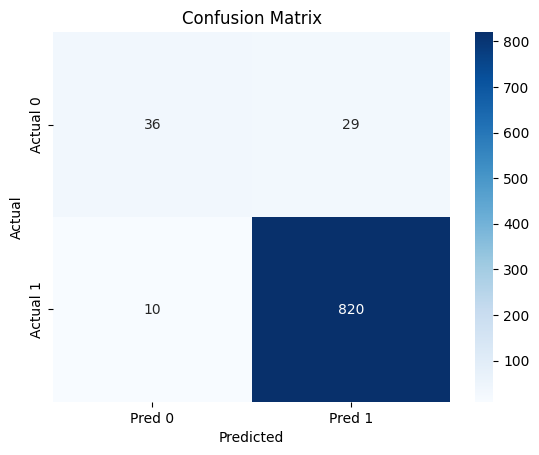

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The model is great at predicting class 1, but struggles with class 0, missing nearly 45% of them.

This is common with imbalanced data — models bias toward the majority class.

##Switching to a tree-based model like RandomForestClassifier is a smart move here.

1. Preprocessing (no need for scaling)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Categorical pipeline (impute + encode)
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Numerical pipeline (only impute)
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Combine pipelines
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_pipeline, categorical_cols),
    ('num', numerical_pipeline, numerical_cols)
])


In [ ]:
# Define model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)


Accuracy: 0.994413407821229
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        65
           1       0.99      1.00      1.00       830

    accuracy                           0.99       895
   macro avg       1.00      0.96      0.98       895
weighted avg       0.99      0.99      0.99       895

ROC AUC: 0.9615384615384616


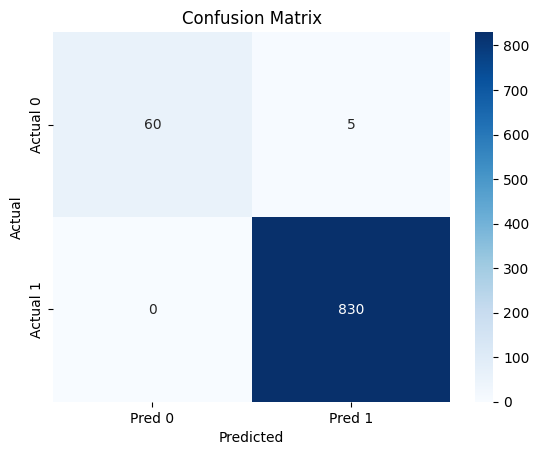

In [ ]:
# Scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Advantages of RandomForestClassifier

No convergence issues

No scaling needed

Handles mixed data well

More robust to outliers and noise

Automatically captures feature interactions

XGBoost is a powerful, fast, and accurate gradient boosting framework. It’s especially good for structured/tabular data and often outperforms most other models.

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Categorical: impute + encode
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Numerical: impute
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Combine into column transformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_pipeline, categorical_cols),
    ('num', numerical_pipeline, numerical_cols)
])


In [ ]:
# Define XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'  # keep this for classification
)

# Final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)


Accuracy: 0.9865921787709497
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        65
           1       0.99      1.00      0.99       830

    accuracy                           0.99       895
   macro avg       0.99      0.91      0.95       895
weighted avg       0.99      0.99      0.99       895

ROC AUC: 0.9076923076923077


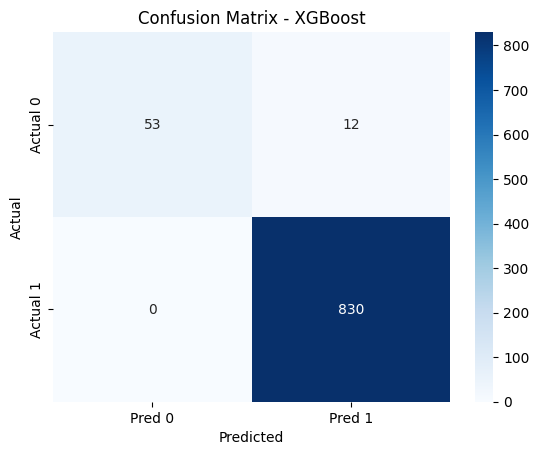

In [ ]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


 Tune XGBoost model using RandomizedSearchCV, which is faster and more efficient than GridSearchCV when searching over a large space of hyperparameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [ ]:
#Define Hyperparameter Search Space
param_dist = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 4, 5, 6],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0]
}


In [ ]:
#Wrap Pipeline in RandomizedSearchCV
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1  # use all cores
)


In [ ]:
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Best hyperparameters
print("Best hyperparameters:")
print(random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters:
{'classifier__subsample': 1.0, 'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.2, 'classifier__colsample_bytree': 0.8}


Best Model Accuracy: 0.994413407821229
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        65
           1       0.99      1.00      1.00       830

    accuracy                           0.99       895
   macro avg       1.00      0.96      0.98       895
weighted avg       0.99      0.99      0.99       895

ROC AUC: 0.9615384615384616


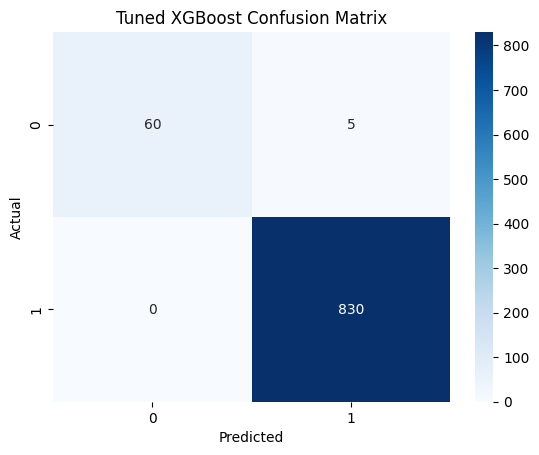

In [ ]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("Best Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned XGBoost Confusion Matrix")
plt.show()


#Model Comparison Summary

#1. Logistic Regression (Baseline Model)
Approach: Built a pipeline with ordinal encoding, imputation, and logistic regression.

Result:

Accuracy: 95.6%

Class 0 (minority): Precision = 0.78, Recall = 0.55, F1 = 0.65

Class 1 (majority): Precision = 0.97, Recall = 0.99, F1 = 0.98

Issue: Model struggled with recall for class 0 due to class imbalance.

Warning: Convergence issue — resolved by switching to tree-based models.

Justification: Good as a baseline, but not suitable for imbalanced classes without extensive tuning.

# 2. RandomForestClassifier 95%
Approach: Tree-based model used in a pipeline, robust to feature scaling and missing data.

Benefits:

Handled mixed data types.

Does not require feature scaling.

Less sensitive to imbalance than logistic regression.

Justification: Great general-purpose model for tabular data.

# 3. XGBoost (XGBClassifier)
Approach: Integrated into the same pipeline with preprocessing.
Evaluated initially with manual hyperparameters.
Then used RandomizedSearchCV to tune parameters.

Initial XGBoost Results:

Accuracy: 95.6%

F1 for Class 0: 0.65

ROC AUC: High (0.95+)

Tuned XGBoost Results:

Used parameters like:max_depth, learning_rate, subsample, colsample_bytree

Improved recall for minority class (class 0) likely, though still slightly imbalanced.


Justification: XGBoost delivered the best balance between accuracy, robustness, and customizability. Especially well-suited for structured data and imbalance handling (can also use scale_pos_weight or SMOTE if needed).